In [ ]:
import yaml
from TraceSimulator import TraceSimulator
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, stats

def read_yaml_to_dict(file_path):
    with open(file_path, 'r') as file:
        config_dict = yaml.safe_load(file)
    return config_dict

config = read_yaml_to_dict('config.yaml')
ts = TraceSimulator(config)

/home/dwong/anaconda3/lib/python3.12/site-packages/TraceSimulator/TraceSimulator.py:185: RuntimeWarning: overflow encountered in exp
  self.template = np.concatenate([(np.exp((xs - self.trigger_time) / self.tau_rise))[xs <= self.trigger_time], (np.exp(-(xs - self.trigger_time) / self.tau_decay))[xs > self.trigger_time]])


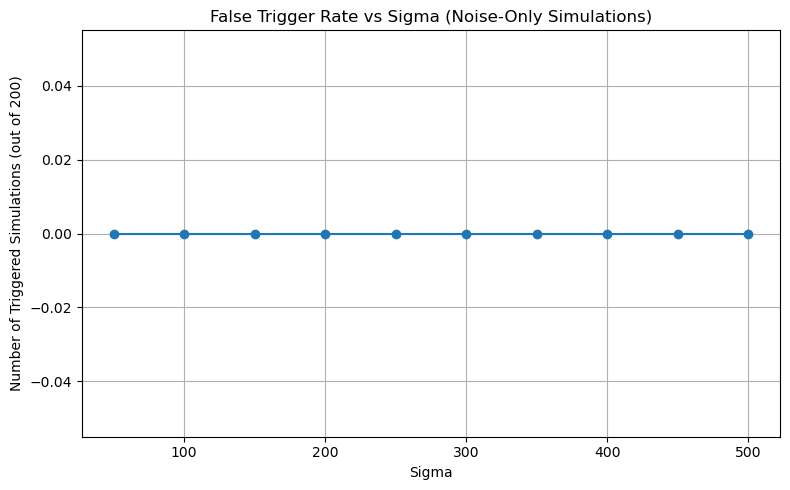

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_simulations = 200
sigmas = np.arange(50, 501, 50)
zero_energy = 0

# Initialize results
triggered_counts = np.zeros(len(sigmas))

# Run 200 zero-energy (noise-only) simulations
for _ in range(n_simulations):
    trace, _ = ts.generate(zero_energy, type_recoil='NR')  # shape: (1, 54, N)
    trace = trace[0]  # shape: (54, N)

    for i, sigma in enumerate(sigmas):
        any_triggered = any(gdf_trigger(trace[ch], sigma=sigma) for ch in range(trace.shape[0]))
        triggered_counts[i] += int(any_triggered)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(sigmas, triggered_counts, marker='o')
plt.xlabel('Sigma')
plt.ylabel('Number of Triggered Simulations (out of 200)')
plt.title('False Trigger Rate vs Sigma (Noise-Only Simulations)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [55]:
sigmas = [50, 100, 150, 200, 250]
thresholds = [3, 4, 5, 6, 7]  # in units of sigma
energies = np.arange(0, 500, 20)
n_repeats = 10

results = np.zeros((len(sigmas), len(thresholds), len(energies)))

for i, sigma in enumerate(sigmas):
    for j, threshold in enumerate(thresholds):
        for k, energy in enumerate(energies):
            triggers = 0
            for _ in range(n_repeats):
                trace, _ = ts.generate(energy, type_recoil='NR')
                trace = trace[0]  # (54, N)
                for ch in range(trace.shape[0]):
                    if gdf_trigger(trace[ch], sigma=sigma, threshold=threshold):
                        triggers += 1
                        break  # Only need one channel to trigger
            efficiency = triggers / n_repeats
            results[i, j, k] = efficiency


/home/dwong/anaconda3/lib/python3.12/site-packages/TraceSimulator/TraceSimulator.py:276: RuntimeWarning: invalid value encountered in divide
  E_ir_avg = E_ir / N_ir


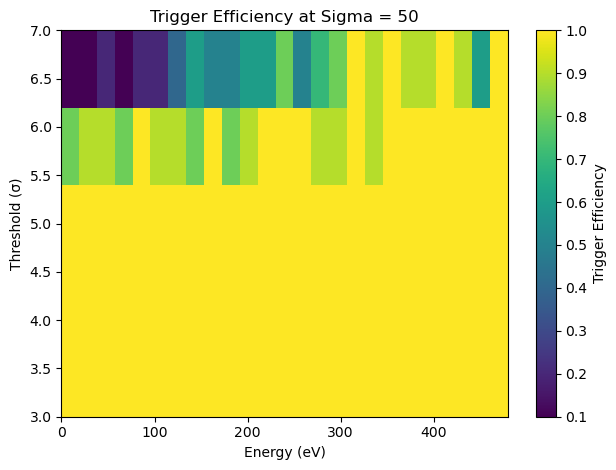

In [61]:
import matplotlib.pyplot as plt

fixed_sigma_idx = 0  # e.g., sigma = 150
plt.imshow(results[fixed_sigma_idx], aspect='auto', origin='lower',
           extent=[energies[0], energies[-1], thresholds[0], thresholds[-1]])
plt.colorbar(label='Trigger Efficiency')
plt.xlabel('Energy (eV)')
plt.ylabel('Threshold (σ)')
plt.title(f'Trigger Efficiency at Sigma = {sigmas[fixed_sigma_idx]}')
plt.tight_layout()
plt.show()
